<a href="https://colab.research.google.com/github/Zedbog/First_repository/blob/master/SkyNet_projekt_klasyfikacja.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [291]:
from google.colab import drive
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
import pandas as pd
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import numpy as np
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import  LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import MultinomialNB, GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import KBinsDiscretizer
from sklearn.preprocessing import LabelEncoder
from google.colab import files
from bs4 import BeautifulSoup
import requests
import re
from sklearn.utils import resample
from sklearn.decomposition import PCA # służy do redukcji wymiarów
%matplotlib inline
import matplotlib.pyplot as plt

In [128]:
drive.mount("/content/drive")\

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [129]:
#for i in range(4):
  #files.upload()

In [130]:
# Wczytanie danych
df1 = pd.read_csv('/content/drive/MyDrive/02_Projekt_praktyczny_klasyfikacja/df1.csv')
df2 = pd.read_csv('/content/drive/MyDrive/02_Projekt_praktyczny_klasyfikacja/df2.csv')
attrition = pd.read_csv('/content/drive/MyDrive/02_Projekt_praktyczny_klasyfikacja/attrition.csv')
sample = pd.read_csv('/content/drive/MyDrive/02_Projekt_praktyczny_klasyfikacja/sample_output.csv')

In [131]:
df1.head()

,EmployeeNumber,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked
0,104,30.0,Travel_Rarely,852.0,Research & Development,1.0,1.0,Life Sciences,1.0,4.0,Male,55.0,2.0,2.0,Laboratory Technician,4.0,Married,5126.0,15998.0,1.0
1,1638,38.0,Travel_Rarely,397.0,Research & Development,2.0,2.0,Medical,1.0,4.0,Female,54.0,2.0,3.0,Manufacturing Director,3.0,Married,7756.0,14199.0,3.0
2,164,26.0,Travel_Rarely,841.0,Research & Development,6.0,3.0,Other,1.0,3.0,Female,46.0,2.0,1.0,Research Scientist,2.0,Married,2368.0,23300.0,1.0
3,395,28.0,Travel_Rarely,1117.0,Research & Development,8.0,2.0,Life Sciences,1.0,4.0,Female,66.0,3.0,1.0,Research Scientist,4.0,Single,3310.0,4488.0,1.0
4,53,35.0,Travel_Rarely,464.0,Research & Development,4.0,2.0,Other,1.0,3.0,Male,75.0,3.0,1.0,Laboratory Technician,4.0,Divorced,1951.0,10910.0,1.0


In [132]:
df2.head()

,EmployeeNumber,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition,YearlyIncome
0,104,Y,Yes,12.0,3.0,3.0,80.0,2.0,10.0,1.0,2.0,10.0,8.0,3.0,0.0,No,61512.0
1,1638,Y,Yes,19.0,3.0,4.0,80.0,1.0,10.0,6.0,4.0,5.0,4.0,0.0,2.0,No,93072.0
2,164,Y,No,19.0,3.0,3.0,80.0,0.0,5.0,3.0,2.0,5.0,4.0,4.0,3.0,No,28416.0
3,395,Y,No,21.0,4.0,4.0,80.0,0.0,5.0,3.0,3.0,5.0,3.0,0.0,2.0,No,39720.0
4,53,Y,No,12.0,3.0,3.0,80.0,1.0,1.0,3.0,3.0,1.0,0.0,0.0,0.0,No,23412.0


In [133]:
attrition.head()

,EmployeeNumber,Attrition
0,104,No
1,1638,No
2,164,No
3,395,No
4,53,No


In [134]:
sample.head()

,EmployeeNumber,Attrition
0,100000,1
1,100001,1
2,100002,1
3,100003,1
4,100004,1


In [135]:
#Sprawdzenie rozmiaru danych
df1.shape , df2.shape, attrition.shape

((4449, 20), (4449, 17), (4449, 2))

In [136]:
attrition.value_counts()

EmployeeNumber  Attrition
7979            Yes          1
5106            No           1
5120            No           1
5119            Yes          1
5118            Yes          1
                            ..
6540            Yes          1
6539            No           1
6538            Yes          1
6537            No           1
1               Yes          1
Length: 4302, dtype: int64

In [137]:
# Podział danych wyjściowych na treningowe i finalne testowe
attrition_test = attrition[(attrition.Attrition == 'Yes') | (attrition.Attrition == 'No')]
attrition_final_test = attrition[(attrition.Attrition != 'Yes') & (attrition.Attrition != 'No')]
# Sprawdzenie rozmiaru podzielonych próbek
attrition_test.shape, attrition_final_test.shape  

((4302, 2), (147, 2))

In [138]:
# Zscalenie danych df1 i df2
data = data = pd.concat([df1,df2],axis=1)
# Sprawdzenie rozmiaru połączonych danych
print(f'{data.shape}\n')

(4449, 37)



In [139]:
data.head()

,EmployeeNumber,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,EmployeeNumber,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition,YearlyIncome
0,104,30.0,Travel_Rarely,852.0,Research & Development,1.0,1.0,Life Sciences,1.0,4.0,Male,55.0,2.0,2.0,Laboratory Technician,4.0,Married,5126.0,15998.0,1.0,104,Y,Yes,12.0,3.0,3.0,80.0,2.0,10.0,1.0,2.0,10.0,8.0,3.0,0.0,No,61512.0
1,1638,38.0,Travel_Rarely,397.0,Research & Development,2.0,2.0,Medical,1.0,4.0,Female,54.0,2.0,3.0,Manufacturing Director,3.0,Married,7756.0,14199.0,3.0,1638,Y,Yes,19.0,3.0,4.0,80.0,1.0,10.0,6.0,4.0,5.0,4.0,0.0,2.0,No,93072.0
2,164,26.0,Travel_Rarely,841.0,Research & Development,6.0,3.0,Other,1.0,3.0,Female,46.0,2.0,1.0,Research Scientist,2.0,Married,2368.0,23300.0,1.0,164,Y,No,19.0,3.0,3.0,80.0,0.0,5.0,3.0,2.0,5.0,4.0,4.0,3.0,No,28416.0
3,395,28.0,Travel_Rarely,1117.0,Research & Development,8.0,2.0,Life Sciences,1.0,4.0,Female,66.0,3.0,1.0,Research Scientist,4.0,Single,3310.0,4488.0,1.0,395,Y,No,21.0,4.0,4.0,80.0,0.0,5.0,3.0,3.0,5.0,3.0,0.0,2.0,No,39720.0
4,53,35.0,Travel_Rarely,464.0,Research & Development,4.0,2.0,Other,1.0,3.0,Male,75.0,3.0,1.0,Laboratory Technician,4.0,Divorced,1951.0,10910.0,1.0,53,Y,No,12.0,3.0,3.0,80.0,1.0,1.0,3.0,3.0,1.0,0.0,0.0,0.0,No,23412.0


In [140]:
# Usunięcie zduplikowanej kolumny w wyniku zscalenia
data = data.loc[:,~data.columns.duplicated()]
# Sprawdzenie rozmiaru połączonych danych
print(f'{data.shape}')

(4449, 36)


In [141]:
data.head()

,EmployeeNumber,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition,YearlyIncome
0,104,30.0,Travel_Rarely,852.0,Research & Development,1.0,1.0,Life Sciences,1.0,4.0,Male,55.0,2.0,2.0,Laboratory Technician,4.0,Married,5126.0,15998.0,1.0,Y,Yes,12.0,3.0,3.0,80.0,2.0,10.0,1.0,2.0,10.0,8.0,3.0,0.0,No,61512.0
1,1638,38.0,Travel_Rarely,397.0,Research & Development,2.0,2.0,Medical,1.0,4.0,Female,54.0,2.0,3.0,Manufacturing Director,3.0,Married,7756.0,14199.0,3.0,Y,Yes,19.0,3.0,4.0,80.0,1.0,10.0,6.0,4.0,5.0,4.0,0.0,2.0,No,93072.0
2,164,26.0,Travel_Rarely,841.0,Research & Development,6.0,3.0,Other,1.0,3.0,Female,46.0,2.0,1.0,Research Scientist,2.0,Married,2368.0,23300.0,1.0,Y,No,19.0,3.0,3.0,80.0,0.0,5.0,3.0,2.0,5.0,4.0,4.0,3.0,No,28416.0
3,395,28.0,Travel_Rarely,1117.0,Research & Development,8.0,2.0,Life Sciences,1.0,4.0,Female,66.0,3.0,1.0,Research Scientist,4.0,Single,3310.0,4488.0,1.0,Y,No,21.0,4.0,4.0,80.0,0.0,5.0,3.0,3.0,5.0,3.0,0.0,2.0,No,39720.0
4,53,35.0,Travel_Rarely,464.0,Research & Development,4.0,2.0,Other,1.0,3.0,Male,75.0,3.0,1.0,Laboratory Technician,4.0,Divorced,1951.0,10910.0,1.0,Y,No,12.0,3.0,3.0,80.0,1.0,1.0,3.0,3.0,1.0,0.0,0.0,0.0,No,23412.0


In [142]:
# Usunięcie nic nie wnoszących danych
data = data.drop(['EmployeeCount', 'StandardHours', 'YearlyIncome', 'Over18'], axis = 1)

In [143]:
# Podział danych wejściowych na treningowe i finalne testowe
data_final_test = data[data.EmployeeNumber >= 10000]
data_test = data[data.EmployeeNumber < 10000]
# Sprawdzenie rozmiaru podzielonych próbek
data_test.shape, data_final_test.shape  

((4302, 32), (147, 32))

In [144]:
data_test.describe()

,EmployeeNumber,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,4302.000000,4302.000000,4302.000000,4302.000000,4302.000000,4302.000000,4302.000000,4302.000000,4302.000000,4302.000000,4302.000000,4302.000000,4302.000000,4302.000000,4302.000000,4302.000000,4302.000000,4302.000000,4302.000000,4302.000000,4302.000000,4302.000000,4302.000000,4302.000000
mean,4809.243143,429.123199,800.843794,34478.313343,2.906788,2.719665,66.036495,2.741516,2.051604,2.722920,6453.266853,14266.381450,2.677359,15.164110,3.146444,2.725709,0.787773,354.004649,2.803347,2.765923,312.854719,367.109484,399.000930,334.767550
std,2643.040205,1591.153416,405.655763,147682.315767,1.026460,1.092333,20.298352,0.711379,1.102569,1.106692,4672.993959,7154.584275,2.490632,3.624112,0.353591,1.079747,0.849147,1508.016854,1.302586,0.708878,1373.999529,1480.107024,1597.939659,1431.991884
min,1.000000,18.000000,102.000000,1.000000,1.000000,1.000000,30.000000,1.000000,1.000000,1.000000,1009.000000,2094.000000,0.000000,11.000000,3.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,1680.250000,31.000000,457.000000,2.000000,2.000000,2.000000,48.000000,2.000000,1.000000,2.000000,2897.000000,7910.250000,1.000000,12.000000,3.000000,2.000000,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,5828.500000,36.000000,804.000000,8.000000,3.000000,3.000000,66.000000,3.000000,2.000000,3.000000,4876.000000,14174.000000,2.000000,14.000000,3.000000,3.000000,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,6903.750000,45.000000,1162.000000,17.000000,4.000000,4.000000,84.000000,3.000000,3.000000,4.000000,8307.750000,20471.000000,4.000000,18.000000,3.000000,4.000000,1.000000,17.000000,3.000000,3.000000,10.000000,7.000000,4.000000,7.000000
max,7979.000000,9890.000000,1499.000000,999590.000000,5.000000,4.000000,100.000000,4.000000,5.000000,4.000000,19999.000000,26999.000000,9.000000,25.000000,4.000000,4.000000,3.000000,9939.000000,6.000000,4.000000,9984.000000,9937.000000,9990.000000,9882.000000


In [145]:
data_final_test.describe()

,EmployeeNumber,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,147.000000,147.000000,147.000000,147.000000,147.000000,147.000000,147.000000,147.000000,147.000000,147.000000,147.000000,147.000000,147.000000,147.000000,147.000000,147.000000,147.000000,147.000000,147.000000,147.000000,147.000000,147.000000,147.000000,147.000000
mean,100073.000000,37.619048,806.115646,9.761905,3.000000,2.707483,64.238095,2.680272,2.108844,2.782313,6914.183673,14563.448980,2.809524,15.877551,3.210884,2.721088,0.727891,11.612245,2.972789,2.714286,6.829932,4.414966,2.095238,4.129252
std,42.579338,8.786145,405.476187,8.412591,0.986206,1.123905,19.640723,0.749305,1.117294,1.131837,4960.314224,7003.840122,2.385267,4.107957,0.409331,1.115165,0.815583,7.457137,1.399342,0.767490,5.414812,3.387818,2.977848,3.310987
min,100000.000000,19.000000,117.000000,1.000000,1.000000,1.000000,30.000000,1.000000,1.000000,1.000000,1102.000000,2104.000000,0.000000,11.000000,3.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,100036.500000,31.000000,479.500000,2.500000,3.000000,2.000000,48.500000,2.000000,1.000000,2.000000,3135.500000,8889.500000,1.000000,12.500000,3.000000,2.000000,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,100073.000000,36.000000,773.000000,8.000000,3.000000,3.000000,64.000000,3.000000,2.000000,3.000000,5154.000000,15146.000000,2.000000,15.000000,3.000000,3.000000,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,100109.500000,43.500000,1163.000000,15.000000,4.000000,4.000000,80.000000,3.000000,3.000000,4.000000,9625.000000,20470.500000,4.000000,19.000000,3.000000,4.000000,1.000000,17.000000,3.000000,3.000000,9.000000,7.000000,2.500000,7.000000
max,100146.000000,60.000000,1499.000000,29.000000,5.000000,4.000000,99.000000,4.000000,5.000000,4.000000,19943.000000,26933.000000,9.000000,25.000000,4.000000,4.000000,3.000000,36.000000,6.000000,4.000000,29.000000,16.000000,15.000000,14.000000


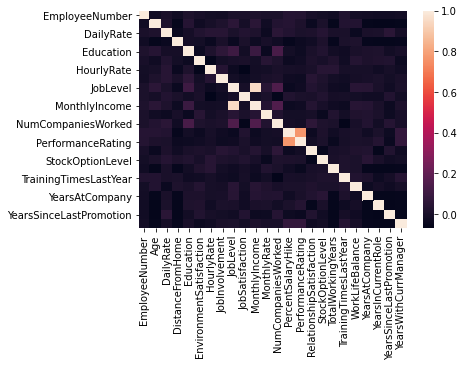

In [146]:
# Sprawdzenie korelacji między pozostałymi danymi
sns.heatmap(data.corr())

In [147]:
# Porównanie średnich wartości w zbiorze final test i treningowym nieodfiltrowanym
data_final_test.mean() , data_test.mean()

(EmployeeNumber              100073.000000
 Age                             37.619048
 DailyRate                      806.115646
 DistanceFromHome                 9.761905
 Education                        3.000000
 EnvironmentSatisfaction          2.707483
 HourlyRate                      64.238095
 JobInvolvement                   2.680272
 JobLevel                         2.108844
 JobSatisfaction                  2.782313
 MonthlyIncome                 6914.183673
 MonthlyRate                  14563.448980
 NumCompaniesWorked               2.809524
 PercentSalaryHike               15.877551
 PerformanceRating                3.210884
 RelationshipSatisfaction         2.721088
 StockOptionLevel                 0.727891
 TotalWorkingYears               11.612245
 TrainingTimesLastYear            2.972789
 WorkLifeBalance                  2.714286
 YearsAtCompany                   6.829932
 YearsInCurrentRole               4.414966
 YearsSinceLastPromotion          2.095238
 YearsWithC

In [148]:
# Duże dysproporcje w średnich wystepują w następujących featurach:
# Age, DistanceFromHome, TotalWorkinYears, YearsAtCompany, YearsInCurrentRole, YearsSinceLastPromotion, YearsWithCurrManager

In [149]:
# Odsianie wartości skrajnych
Q1 = data_test.quantile(0.00)
Q3 = data_test.quantile(0.93)
IQR = Q3 - Q1
data_test_filtered = data_test[~((data_test < (Q1 - 1.5 * IQR)) | (data_test > (Q3 + 1.5 * IQR))).any(axis=1)]
data_test_filtered.describe()

,EmployeeNumber,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,2351.000000,2351.000000,2351.000000,2351.000000,2351.000000,2351.000000,2351.000000,2351.000000,2351.000000,2351.000000,2351.000000,2351.000000,2351.000000,2351.000000,2351.000000,2351.000000,2351.000000,2351.000000,2351.000000,2351.000000,2351.000000,2351.000000,2351.000000,2351.000000
mean,3399.864313,36.967248,799.252233,9.253509,2.915355,2.713313,66.503615,2.751595,2.073586,2.720119,6541.506168,14289.114845,2.673330,15.146321,3.145045,2.759677,0.769885,11.349213,2.765632,2.777116,7.143769,4.238622,2.149298,4.222884
std,2787.632321,9.108810,400.960014,8.137460,1.026491,1.083488,20.121564,0.701042,1.106320,1.092691,4727.405739,7052.760571,2.507615,3.578521,0.352221,1.077273,0.828869,7.872394,1.313411,0.707771,6.293915,3.644356,3.212648,3.650894
min,1.000000,18.000000,102.000000,1.000000,1.000000,1.000000,30.000000,1.000000,1.000000,1.000000,1009.000000,2094.000000,0.000000,11.000000,3.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,909.500000,30.000000,461.500000,2.000000,2.000000,2.000000,49.000000,2.000000,1.000000,2.000000,2932.000000,8192.000000,1.000000,12.000000,3.000000,2.000000,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,1830.000000,36.000000,802.000000,7.000000,3.000000,3.000000,67.000000,3.000000,2.000000,3.000000,4968.000000,14199.000000,2.000000,14.000000,3.000000,3.000000,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,6226.500000,43.000000,1153.500000,14.000000,4.000000,4.000000,84.000000,3.000000,3.000000,4.000000,8487.000000,20351.000000,4.000000,18.000000,3.000000,4.000000,1.000000,15.000000,3.000000,3.000000,10.000000,7.000000,2.000000,7.000000
max,7963.000000,60.000000,1498.000000,29.000000,5.000000,4.000000,100.000000,4.000000,5.000000,4.000000,19999.000000,26999.000000,9.000000,25.000000,4.000000,4.000000,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [150]:
# Porównanie średnich wartości w zbiorze final test i treningowym odfiltrowanym
data_final_test.mean() , data_test_filtered.mean()

(EmployeeNumber              100073.000000
 Age                             37.619048
 DailyRate                      806.115646
 DistanceFromHome                 9.761905
 Education                        3.000000
 EnvironmentSatisfaction          2.707483
 HourlyRate                      64.238095
 JobInvolvement                   2.680272
 JobLevel                         2.108844
 JobSatisfaction                  2.782313
 MonthlyIncome                 6914.183673
 MonthlyRate                  14563.448980
 NumCompaniesWorked               2.809524
 PercentSalaryHike               15.877551
 PerformanceRating                3.210884
 RelationshipSatisfaction         2.721088
 StockOptionLevel                 0.727891
 TotalWorkingYears               11.612245
 TrainingTimesLastYear            2.972789
 WorkLifeBalance                  2.714286
 YearsAtCompany                   6.829932
 YearsInCurrentRole               4.414966
 YearsSinceLastPromotion          2.095238
 YearsWithC

Z zestawienia wartości średnich zbioru testowego i treningowego widać, że po odsianiu górnych 7% wartości rząd wielkości wartości średnich w obu zbiorach danych jest zbliżony.
Pozwala wysnuć to wniosek, że dane wykorzystane do wyuczenia modelu dadzą wiarygodne wyniki dla danych testowych.

In [151]:
# Zamiana w etykietowwanych featurach etykiet klasyfikujących na one hot vector
data_test_filtered_dummies = pd.get_dummies(data_test_filtered, columns=['BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole', 'MaritalStatus', 'OverTime'])

In [152]:
# SPrawdzenie rozmiaru one hot vector
data_test_filtered_dummies.shape

(2351, 53)

In [153]:
data_test_filtered_dummies.head()

,EmployeeNumber,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition,BusinessTravel_Non-Travel,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,Department_Human Resources,Department_Research & Development,Department_Sales,EducationField_Human Resources,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree,Gender_Female,Gender_Male,JobRole_Healthcare Representative,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,OverTime_No,OverTime_Yes
0,104,30.0,852.0,1.0,1.0,4.0,55.0,2.0,2.0,4.0,5126.0,15998.0,1.0,12.0,3.0,3.0,2.0,10.0,1.0,2.0,10.0,8.0,3.0,0.0,No,0,0,1,0,1,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,1
1,1638,38.0,397.0,2.0,2.0,4.0,54.0,2.0,3.0,3.0,7756.0,14199.0,3.0,19.0,3.0,4.0,1.0,10.0,6.0,4.0,5.0,4.0,0.0,2.0,No,0,0,1,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1
2,164,26.0,841.0,6.0,3.0,3.0,46.0,2.0,1.0,2.0,2368.0,23300.0,1.0,19.0,3.0,3.0,0.0,5.0,3.0,2.0,5.0,4.0,4.0,3.0,No,0,0,1,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0
3,395,28.0,1117.0,8.0,2.0,4.0,66.0,3.0,1.0,4.0,3310.0,4488.0,1.0,21.0,4.0,4.0,0.0,5.0,3.0,3.0,5.0,3.0,0.0,2.0,No,0,0,1,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0
4,53,35.0,464.0,4.0,2.0,3.0,75.0,3.0,1.0,4.0,1951.0,10910.0,1.0,12.0,3.0,3.0,1.0,1.0,3.0,3.0,1.0,0.0,0.0,0.0,No,0,0,1,0,1,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,1,0


In [154]:
# Zamiana atrybutu Attrition z 'Yes' na 1 i z 'No' na 0
data_test_filtered_dummies.Attrition = data_test_filtered_dummies.Attrition.map({"Yes": 1, "No": 0})
data_test_filtered_dummies.Attrition.value_counts()

0    1447
1     904
Name: Attrition, dtype: int64

In [155]:
data_test_filtered_dummies.head()

,EmployeeNumber,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition,BusinessTravel_Non-Travel,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,Department_Human Resources,Department_Research & Development,Department_Sales,EducationField_Human Resources,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree,Gender_Female,Gender_Male,JobRole_Healthcare Representative,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,OverTime_No,OverTime_Yes
0,104,30.0,852.0,1.0,1.0,4.0,55.0,2.0,2.0,4.0,5126.0,15998.0,1.0,12.0,3.0,3.0,2.0,10.0,1.0,2.0,10.0,8.0,3.0,0.0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,1
1,1638,38.0,397.0,2.0,2.0,4.0,54.0,2.0,3.0,3.0,7756.0,14199.0,3.0,19.0,3.0,4.0,1.0,10.0,6.0,4.0,5.0,4.0,0.0,2.0,0,0,0,1,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1
2,164,26.0,841.0,6.0,3.0,3.0,46.0,2.0,1.0,2.0,2368.0,23300.0,1.0,19.0,3.0,3.0,0.0,5.0,3.0,2.0,5.0,4.0,4.0,3.0,0,0,0,1,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0
3,395,28.0,1117.0,8.0,2.0,4.0,66.0,3.0,1.0,4.0,3310.0,4488.0,1.0,21.0,4.0,4.0,0.0,5.0,3.0,3.0,5.0,3.0,0.0,2.0,0,0,0,1,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0
4,53,35.0,464.0,4.0,2.0,3.0,75.0,3.0,1.0,4.0,1951.0,10910.0,1.0,12.0,3.0,3.0,1.0,1.0,3.0,3.0,1.0,0.0,0.0,0.0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,1,0


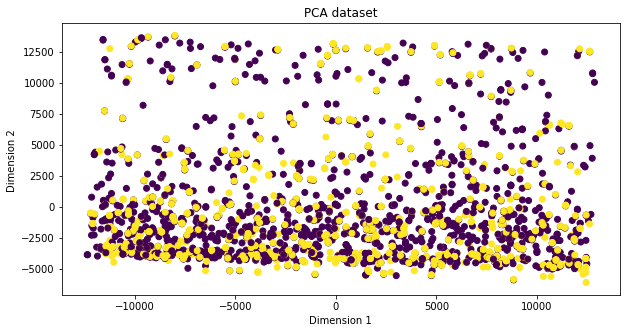

In [156]:
# Redukcja wymiarowości i sprawdzenie rozkładu danych 
plt.figure(figsize=(10, 5))
X_pca = PCA().fit_transform(data_test_filtered_dummies.loc[:, data_test_filtered_dummies.columns != 'Attrition'])
plt.title('PCA dataset')
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2 ')
plt.scatter(X_pca[:,0], X_pca[:,1], c=data_test_filtered_dummies.Attrition)

Przyjmujemy, że powyższy rozkład danych może zostać przyjęty do rozważania.

In [157]:
# Sprawdzenie rozkładu klas po odfiltorwaniu danych
data_test_filtered_dummies.Attrition.value_counts()

0    1447
1     904
Name: Attrition, dtype: int64

W związku z niezbalansowanym rozkładem członków poszczególnych klas w odfiltrowanym zbiorze danych dokonujemy OVERSAMPLINGU w celu zrównania obu populacji.

In [158]:
attrition_no = data_test_filtered_dummies[data_test_filtered_dummies.Attrition == 0]
attrition_yes = data_test_filtered_dummies[data_test_filtered_dummies.Attrition == 1]

# Upsample attrition_yes class
attrition_yes_upsampled = resample(attrition_yes,
                            replace=True,    # sample with replacement
                            n_samples=len(attrition_no),    # to match majority class
                            random_state=42) # reproducible results
 
# Combine majority class with upsampled minority class
data_test_filtered_dummies_upsampled = pd.concat([attrition_no, attrition_yes_upsampled])
 
# Display new class counts
data_test_filtered_dummies_upsampled.Attrition.value_counts()

1    1447
0    1447
Name: Attrition, dtype: int64

In [159]:
# Przypisanie zmiennych do X i y
X = data_test_filtered_dummies_upsampled.loc[:, data_test_filtered_dummies_upsampled.columns != 'Attrition']
y = data_test_filtered_dummies_upsampled.Attrition

In [160]:
X.head()

,EmployeeNumber,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,BusinessTravel_Non-Travel,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,Department_Human Resources,Department_Research & Development,Department_Sales,EducationField_Human Resources,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree,Gender_Female,Gender_Male,JobRole_Healthcare Representative,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,OverTime_No,OverTime_Yes
0,104,30.0,852.0,1.0,1.0,4.0,55.0,2.0,2.0,4.0,5126.0,15998.0,1.0,12.0,3.0,3.0,2.0,10.0,1.0,2.0,10.0,8.0,3.0,0.0,0,0,1,0,1,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,1
1,1638,38.0,397.0,2.0,2.0,4.0,54.0,2.0,3.0,3.0,7756.0,14199.0,3.0,19.0,3.0,4.0,1.0,10.0,6.0,4.0,5.0,4.0,0.0,2.0,0,0,1,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1
2,164,26.0,841.0,6.0,3.0,3.0,46.0,2.0,1.0,2.0,2368.0,23300.0,1.0,19.0,3.0,3.0,0.0,5.0,3.0,2.0,5.0,4.0,4.0,3.0,0,0,1,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0
3,395,28.0,1117.0,8.0,2.0,4.0,66.0,3.0,1.0,4.0,3310.0,4488.0,1.0,21.0,4.0,4.0,0.0,5.0,3.0,3.0,5.0,3.0,0.0,2.0,0,0,1,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0
4,53,35.0,464.0,4.0,2.0,3.0,75.0,3.0,1.0,4.0,1951.0,10910.0,1.0,12.0,3.0,3.0,1.0,1.0,3.0,3.0,1.0,0.0,0.0,0.0,0,0,1,0,1,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,1,0


In [161]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: Attrition, dtype: int64

Trenowanie modeli

In [162]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

#Logistic Regression

In [163]:
# params_lr = {
#     'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
#     'solver': ['newton-cg','saga', 'liblinear', 'lbfgs'],
#     'max_iter': [100, 500, 1000, 5000]
# }

# clf = GridSearchCV(LogisticRegression(), params_lr, scoring='f1')
# clf.fit(X_train, y_train)
# clf.best_params_

In [164]:
model = LogisticRegression(C=1, max_iter=100, solver='newton-cg')
model.fit(X_train, y_train)
y_pred_lr = model.predict(X_test)
print(f'{model.__class__.__name__}\n{classification_report(y_test, y_pred_lr)}\nAverage F1 score: {f1_score(y_test, y_pred_lr, average="micro")}')

LogisticRegression
              precision    recall  f1-score   support

           0       0.75      0.71      0.73       290
           1       0.73      0.76      0.75       289

    accuracy                           0.74       579
   macro avg       0.74      0.74      0.74       579
weighted avg       0.74      0.74      0.74       579

Average F1 score: 0.7392055267702936


#KNN

In [165]:
# params_knn= {
#     'n_neighbors': [2, 3, 5, 7, 10, 15],
#     'algorithm': ['auto','ball_tree', 'kd_tree'],
#     'p': [1, 2]
# }

# clf = GridSearchCV(KNeighborsClassifier(), params_knn, scoring='f1')
# clf.fit(X_train, y_train)
# clf.best_params_

{'algorithm': 'auto', 'n_neighbors': 3, 'p': 2}

In [166]:
model = KNeighborsClassifier(algorithm='auto', n_neighbors=3, p=2)
model.fit(X_train, y_train)
y_pred_knn = model.predict(X_test)
print(f'{model.__class__.__name__}\n{classification_report(y_test, y_pred_knn)}\nAverage F1 score: {f1_score(y_test, y_pred_knn, average="micro")}')

KNeighborsClassifier
              precision    recall  f1-score   support

           0       0.82      0.64      0.72       290
           1       0.71      0.85      0.77       289

    accuracy                           0.75       579
   macro avg       0.76      0.75      0.75       579
weighted avg       0.76      0.75      0.75       579

Average F1 score: 0.7495682210708118


#SVC

In [167]:
# params_svc= {
#     'C': [1, 10, 100],
#     # 'kernel': ['linear'],
#     'gamma':[0.01, 0.1, 1],
#    'class_weight': [None, 'balanced']
# }

# clf = GridSearchCV(SVC(), params_svc, scoring='f1')
# clf.fit(X_train, y_train)
# clf.best_params_

In [168]:
model = SVC(C=100, class_weight=None, gamma=0.1)
model.fit(X_train, y_train)
y_pred_svc = model.predict(X_test)
print(f'{model.__class__.__name__}\n{classification_report(y_test, y_pred_svc)}\nAverage F1 score: {f1_score(y_test, y_pred_svc, average="micro")}')

SVC
              precision    recall  f1-score   support

           0       0.84      0.85      0.84       290
           1       0.85      0.84      0.84       289

    accuracy                           0.84       579
   macro avg       0.84      0.84      0.84       579
weighted avg       0.84      0.84      0.84       579

Average F1 score: 0.842832469775475


#DecisionTreeClassifier

In [170]:
# params_tree = {
#     'criterion': ['gini', 'entropy'],
#     'max_depth': [3, 5, 7, 9, 12, 15],
#     'min_samples_split': [2, 4, 7],
#     'min_samples_leaf': [1, 3, 5]
# }

# clf = GridSearchCV(DecisionTreeClassifier(), params_tree, scoring='f1')
# clf.fit(X_train, y_train)
# clf.best_params_

{'criterion': 'gini',
 'max_depth': 9,
 'min_samples_leaf': 1,
 'min_samples_split': 2}

In [171]:
model = DecisionTreeClassifier(criterion='gini', max_depth=9, min_samples_leaf=1, min_samples_split=2)
model.fit(X_train, y_train)
y_pred_tree = model.predict(X_test)
print(f'{model.__class__.__name__}\n{classification_report(y_test, y_pred_tree)}\nAverage F1 score: {f1_score(y_test, y_pred_tree, average="micro")}')

DecisionTreeClassifier
              precision    recall  f1-score   support

           0       0.87      0.71      0.78       290
           1       0.76      0.89      0.82       289

    accuracy                           0.80       579
   macro avg       0.81      0.80      0.80       579
weighted avg       0.81      0.80      0.80       579

Average F1 score: 0.8031088082901554


#GaussianNB

In [172]:
model = GaussianNB()
model.fit(X_train, y_train)
y_pred_gnb = model.predict(X_test)
print(f'{model.__class__.__name__}\n{classification_report(y_test, y_pred_gnb)}\nAverage F1 score: {f1_score(y_test, y_pred_gnb, average="micro")}')

GaussianNB
              precision    recall  f1-score   support

           0       0.69      0.71      0.70       290
           1       0.70      0.69      0.69       289

    accuracy                           0.70       579
   macro avg       0.70      0.70      0.70       579
weighted avg       0.70      0.70      0.70       579

Average F1 score: 0.697754749568221


#MultinomialNB

In [173]:
model = MultinomialNB()
model.fit(X_train, y_train)
y_pred_mnb = model.predict(X_test)
print(f'{model.__class__.__name__}\n{classification_report(y_test, y_pred_mnb)}\nAverage F1 score: {f1_score(y_test, y_pred_mnb, average="micro")}')

MultinomialNB
              precision    recall  f1-score   support

           0       0.72      0.71      0.72       290
           1       0.71      0.73      0.72       289

    accuracy                           0.72       579
   macro avg       0.72      0.72      0.72       579
weighted avg       0.72      0.72      0.72       579

Average F1 score: 0.7184801381692575


#BaggingClassifier

In [ ]:
# params_bagging = {
#     'base_estimator': [SVC(C=100, class_weight=None, gamma=0.1), DecisionTreeClassifier(criterion='gini', max_depth=9, min_samples_leaf=1, min_samples_split=2)],
#     'max_samples': [1, 3, 5, 10],
# }

# clf = GridSearchCV(BaggingClassifier(), params_bagging, scoring='f1')
# clf.fit(X_train, y_train)
# clf.best_params_

In [179]:
model = BaggingClassifier(
    base_estimator=SVC(C=100, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
                       decision_function_shape='ovr', degree=3, gamma=0.1, kernel='rbf',
                       max_iter=-1, probability=False, random_state=None, shrinking=True,
                       tol=0.001, verbose=False),
                       max_samples=10
                       )
model.fit(X_train, y_train)
y_pred_bagging = model.predict(X_test)
print(f'{model.__class__.__name__}\n{classification_report(y_test, y_pred_bagging)}\nAverage F1 score: {f1_score(y_test, y_pred_bagging, average="micro")}')

BaggingClassifier
              precision    recall  f1-score   support

           0       0.50      1.00      0.67       290
           1       1.00      0.00      0.01       289

    accuracy                           0.50       579
   macro avg       0.75      0.50      0.34       579
weighted avg       0.75      0.50      0.34       579

Average F1 score: 0.5025906735751295


#AdaBoostClassifier

In [ ]:
# params_boosting = {
#     'base_estimator': [SVC(C=100, class_weight=None, gamma=0.1), DecisionTreeClassifier(criterion='gini', max_depth=9, min_samples_leaf=1, min_samples_split=2), KNeighborsClassifier(algorithm='auto', n_neighbors=3, p=2)],
#     'algorithm': ['SAMME', 'SAMME.R'],
# }

# clf = GridSearchCV(AdaBoostClassifier(random_state=42), params_boosting, scoring='f1')
# clf.fit(X_train, y_train)
# clf.best_params_

In [182]:
model = AdaBoostClassifier(base_estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                        max_depth=9, max_features=None, max_leaf_nodes=None,
                        min_impurity_decrease=0.0, min_impurity_split=None,
                        min_samples_leaf=1, min_samples_split=2,
                        min_weight_fraction_leaf=0.0, presort='deprecated',
                        random_state=None, splitter='best'),
                        algorithm='SAMME')
model.fit(X_train, y_train)
y_pred_boosting = model.predict(X_test)
print(f'{model.__class__.__name__}\n{classification_report(y_test, y_pred_boosting)}\nAverage F1 score: {f1_score(y_test, y_pred_boosting, average="micro")}')

AdaBoostClassifier
              precision    recall  f1-score   support

           0       0.86      0.78      0.81       290
           1       0.79      0.87      0.83       289

    accuracy                           0.82       579
   macro avg       0.82      0.82      0.82       579
weighted avg       0.82      0.82      0.82       579

Average F1 score: 0.8221070811744385


#RandomForestClassifier

In [184]:
# params_forest = {
#     # 'n_estimators': [100, 200, 500],
#     'criterion': ['gini', 'entropy'],
#     'max_depth': [3, 5, 7, 15],
#     'min_samples_split': [2, 4, 6, 9],
#     'min_samples_leaf': [2, 3, 4, 5],
#     'max_features': ['auto', None]
# }

# clf = GridSearchCV(RandomForestClassifier(random_state=42), params_forest,scoring='f1')
# clf.fit(X_train, y_train)
# clf.best_params_

{'criterion': 'entropy',
 'max_depth': 15,
 'max_features': None,
 'min_samples_leaf': 2,
 'min_samples_split': 2}

In [185]:
model = RandomForestClassifier(criterion='entropy', max_depth=15, max_features=None, min_samples_leaf=2, min_samples_split=2)
model.fit(X_train, y_train)
y_pred_forest = model.predict(X_test)
print(f'{model.__class__.__name__}\n{classification_report(y_test, y_pred_forest)}\nAverage F1 score: {f1_score(y_test, y_pred_forest, average="micro")}')

RandomForestClassifier
              precision    recall  f1-score   support

           0       0.89      0.74      0.81       290
           1       0.78      0.91      0.84       289

    accuracy                           0.82       579
   macro avg       0.83      0.82      0.82       579
weighted avg       0.83      0.82      0.82       579

Average F1 score: 0.8238341968911919


# VotingClassifier

In [249]:
model = VotingClassifier(estimators=[('forest', RandomForestClassifier(criterion='entropy', max_depth=15, max_features=None, min_samples_leaf=2, min_samples_split=2)),
                                      ('boosting', AdaBoostClassifier(base_estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                        max_depth=9, max_features=None, max_leaf_nodes=None,
                        min_impurity_decrease=0.0, min_impurity_split=None,
                        min_samples_leaf=1, min_samples_split=2,
                        min_weight_fraction_leaf=0.0, presort='deprecated',
                        random_state=None, splitter='best'),
                        algorithm='SAMME')),
                        ('svm', SVC(C=100, class_weight=None, gamma=0.1,random_state=42))], voting='hard')
model.fit(X_train, y_train)
y_pred_voting = model.predict(X_test)
print(f'{model.__class__.__name__}\n{classification_report(y_test, y_pred_voting)}\nAverage F1 score: {f1_score(y_test, y_pred_voting, average="micro")}')

VotingClassifier
              precision    recall  f1-score   support

           0       0.86      0.79      0.83       290
           1       0.81      0.88      0.84       289

    accuracy                           0.83       579
   macro avg       0.83      0.83      0.83       579
weighted avg       0.83      0.83      0.83       579

Average F1 score: 0.8324697754749569


In [250]:
# Zestawienie wyników wszystkich przebadanych klasyfikatorów i wyłonienie zwycięzcy
y_preds = [y_pred_lr, y_pred_knn, y_pred_svc, y_pred_gnb, y_pred_mnb, y_pred_tree, y_pred_bagging, y_pred_boosting, y_pred_forest, y_pred_voting]
f1_scores = []
for y_pred in y_preds:
  f1_scores.append(f1_score(y_test, y_pred, average="micro"))
  print(f'Average F1 score: {f1_score(y_test, y_pred, average="micro")}')

Average F1 score: 0.7392055267702936
Average F1 score: 0.7495682210708118
Average F1 score: 0.842832469775475
Average F1 score: 0.697754749568221
Average F1 score: 0.7184801381692575
Average F1 score: 0.8031088082901554
Average F1 score: 0.5025906735751295
Average F1 score: 0.8221070811744385
Average F1 score: 0.8238341968911919
Average F1 score: 0.8324697754749569


1. SVC: 0.842832469775475
2. Voting: 0.8324697754749569
3. RandomForest: 0.8238341968911919
4. AdaBoost: 0.8221070811744385

In [253]:
# Zestawienie i zapis wszystkich modeli z najlepszymi parametrami
clf_lr = LogisticRegression(C=1, max_iter=100, solver='newton-cg',random_state=42)
clf_knn = KNeighborsClassifier(algorithm='auto', n_neighbors=3, p=2)
clf_svc = SVC(C=100, class_weight=None, gamma=0.1,random_state=42)
clf_tree = DecisionTreeClassifier(criterion='gini', max_depth=9, min_samples_leaf=1, min_samples_split=2, random_state=42)
clf_gnb = GaussianNB()
clf_mnb = MultinomialNB()
clf_bagging = BaggingClassifier(
    base_estimator=SVC(C=100, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
                       decision_function_shape='ovr', degree=3, gamma=0.1, kernel='rbf',
                       max_iter=-1, probability=False, random_state=None, shrinking=True,
                       tol=0.001, verbose=False),
                       max_samples=10
                       )
clf_boosting = AdaBoostClassifier(base_estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                        max_depth=9, max_features=None, max_leaf_nodes=None,
                        min_impurity_decrease=0.0, min_impurity_split=None,
                        min_samples_leaf=1, min_samples_split=2,
                        min_weight_fraction_leaf=0.0, presort='deprecated',
                        random_state=None, splitter='best'),
                        algorithm='SAMME')
clf_forest = RandomForestClassifier(criterion='entropy', max_depth=15, max_features=None, min_samples_leaf=2, min_samples_split=2, random_state=42)
clf_voting = VotingClassifier(estimators=[('forest', RandomForestClassifier(criterion='entropy', max_depth=15, max_features=None, min_samples_leaf=2, min_samples_split=2)),
                                      ('boosting', AdaBoostClassifier(base_estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                        max_depth=9, max_features=None, max_leaf_nodes=None,
                        min_impurity_decrease=0.0, min_impurity_split=None,
                        min_samples_leaf=1, min_samples_split=2,
                        min_weight_fraction_leaf=0.0, presort='deprecated',
                        random_state=None, splitter='best'),
                        algorithm='SAMME')),
                        ('svm', SVC(C=100, class_weight=None, gamma=0.1,random_state=42))], voting='hard')

# Weryfikacja skuteczności modeli na danych znormalizowanych, standaryzowanych i zdyskretyzowanych

In [294]:
preprocesser = [None, Normalizer(), StandardScaler(), MinMaxScaler(), KBinsDiscretizer(n_bins=10, strategy='uniform')]

In [269]:
# Normalizacja
X_normalized = preprocesser[1].fit_transform(X)

In [270]:
# Standaryzacja
X_standarized = preprocesser[2].fit_transform(X)

In [282]:
# MinMax Standaryzacja
X_minmax_standarized = preprocesser[3].fit_transform(X)

In [295]:
# Dyskretyzacja
X_bins = preprocesser[4].fit_transform(X)

In [271]:
# Kroswalidacja na danych znormalizowanych - wyniki dla wszystkich modeli
for clf in (clf_lr, clf_knn, clf_svc, clf_tree, clf_gnb, clf_mnb, clf_bagging, clf_boosting, clf_forest, clf_voting):
  predicted, true = [], []
  for train_index, test_index in StratifiedKFold(n_splits=10, shuffle=True, random_state=42).split(X_normalized, y):
    X_train, X_test = X_normalized[train_index], X_normalized[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    clf.fit(X=X_train, y=y_train)
    predicted.extend(clf.predict(X_test))
    true.extend(y_test)
  print(f"{clf.__class__.__name__}: Average F1 score:{f1_score(true, predicted, average='micro')}")

LogisticRegression: Average F1 score:0.7304768486523843
KNeighborsClassifier: Average F1 score:0.7598479612992398
SVC: Average F1 score:0.756046993780235
DecisionTreeClassifier: Average F1 score:0.8051140290255702
GaussianNB: Average F1 score:0.5566689702833448
MultinomialNB: Average F1 score:0.7277125086385625
BaggingClassifier: Average F1 score:0.6890117484450587
AdaBoostClassifier: Average F1 score:0.8645473393227368
RandomForestClassifier: Average F1 score:0.849689011748445
VotingClassifier: Average F1 score:0.8562543192812716


In [273]:
# Kroswalidacja na danych standaryzowanych - wyniki dla wszystkich modeli
for clf in (clf_lr, clf_knn, clf_svc, clf_tree, clf_gnb, clf_bagging, clf_boosting, clf_forest, clf_voting):
  predicted, true = [], []
  for train_index, test_index in StratifiedKFold(n_splits=10, shuffle=True, random_state=42).split(X_standarized, y):
    X_train, X_test = X_standarized[train_index], X_standarized[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    clf.fit(X=X_train, y=y_train)
    predicted.extend(clf.predict(X_test))
    true.extend(y_test)
  print(f"{clf.__class__.__name__}: Average F1 score:{f1_score(true, predicted, average='micro')}")

LogisticRegression: Average F1 score:0.7639944713199723
KNeighborsClassifier: Average F1 score:0.7176917760884589
SVC: Average F1 score:0.7850725639253628
DecisionTreeClassifier: Average F1 score:0.8182446440912232
GaussianNB: Average F1 score:0.6651693158258466
BaggingClassifier: Average F1 score:0.5269523151347616
AdaBoostClassifier: Average F1 score:0.8631651693158259
RandomForestClassifier: Average F1 score:0.8514167242570836
VotingClassifier: Average F1 score:0.8610919143054596


In [283]:
# Kroswalidacja na danych standaryzowanych MinMax- wyniki dla wszystkich modeli bez mnb
for clf in (clf_lr, clf_knn, clf_svc, clf_tree, clf_gnb, clf_bagging, clf_boosting, clf_forest, clf_voting):
  predicted, true = [], []
  for train_index, test_index in StratifiedKFold(n_splits=10, shuffle=True, random_state=42).split(X_minmax_standarized, y):
    X_train, X_test = X_minmax_standarized[train_index], X_minmax_standarized[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    clf.fit(X=X_train, y=y_train)
    predicted.extend(clf.predict(X_test))
    true.extend(y_test)
  print(f"{clf.__class__.__name__}: Average F1 score:{f1_score(true, predicted, average='micro')}")

LogisticRegression: Average F1 score:0.7639944713199723
KNeighborsClassifier: Average F1 score:0.7100898410504493
SVC: Average F1 score:0.8296475466482377
DecisionTreeClassifier: Average F1 score:0.8165169315825846
GaussianNB: Average F1 score:0.6651693158258466
BaggingClassifier: Average F1 score:0.5836212854181064
AdaBoostClassifier: Average F1 score:0.8683483068417416
RandomForestClassifier: Average F1 score:0.8507256392536282
VotingClassifier: Average F1 score:0.8548721492743607


In [298]:
# Kroswalidacja na danych zdyskretyzowanych - wyniki dla wszystkich modeli bez gnb
for clf in (clf_lr, clf_knn, clf_svc, clf_tree, clf_bagging, clf_boosting, clf_forest, clf_voting):
  predicted, true = [], []
  for train_index, test_index in StratifiedKFold(n_splits=10, shuffle=True, random_state=42).split(X_bins, y):
    X_train, X_test = X_bins[train_index], X_bins[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    clf.fit(X=X_train, y=y_train)
    predicted.extend(clf.predict(X_test))
    true.extend(y_test)
  print(f"{clf.__class__.__name__}: Average F1 score:{f1_score(true, predicted, average='micro')}")

LogisticRegression: Average F1 score:0.7843814789219073
KNeighborsClassifier: Average F1 score:0.7194194885970974
SVC: Average F1 score:0.7909467864547339
DecisionTreeClassifier: Average F1 score:0.8113337940566689
BaggingClassifier: Average F1 score:0.5093296475466482
AdaBoostClassifier: Average F1 score:0.8441603317208016
RandomForestClassifier: Average F1 score:0.848652384243262
VotingClassifier: Average F1 score:0.8514167242570836


Najlepszy rezultat spośród wszystkich modeli (0.8683483068417416) daje AdaBoostClassifier na danych przetransformowanych MinMaxScaler'em.




In [304]:
# Sprawdzenie najlepszego modelu na różnych wariantach kroswalidacji na danych standaryzowanych MinMax
n_splits = [3, 5, 10, 20, 30, 50, 70, 100, 130]
f1_scores = []
for n_split in n_splits:
  print(f'StratifiedKFold n_splits= {n_split}')
  predicted, true = [], []
  for train_index, test_index in StratifiedKFold(n_splits=n_split, shuffle=True, random_state=42).split(X_minmax_standarized, y):
    X_train, X_test = X_minmax_standarized[train_index], X_minmax_standarized[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    clf_boosting.fit(X=X_train, y=y_train)  #AdaBoostClassifier
    predicted.extend(clf_boosting.predict(X_test))
    true.extend(y_test)
  print(f"Average F1 score:{f1_score(true, predicted, average='micro')}")
  f1_scores.append(f1_score(true, predicted, average='micro'))

StratifiedKFold n_splits= 3
Average F1 score:0.8427781617138909
StratifiedKFold n_splits= 5
Average F1 score:0.8483068417415343
StratifiedKFold n_splits= 10
Average F1 score:0.8680027643400138
StratifiedKFold n_splits= 20
Average F1 score:0.8707671043538355
StratifiedKFold n_splits= 30
Average F1 score:0.869039391845197
StratifiedKFold n_splits= 50
Average F1 score:0.8742225293711127
StratifiedKFold n_splits= 70
Average F1 score:0.8762957843814789
StratifiedKFold n_splits= 100
Average F1 score:0.8752591568762957
StratifiedKFold n_splits= 130
Average F1 score:0.8735314443676572


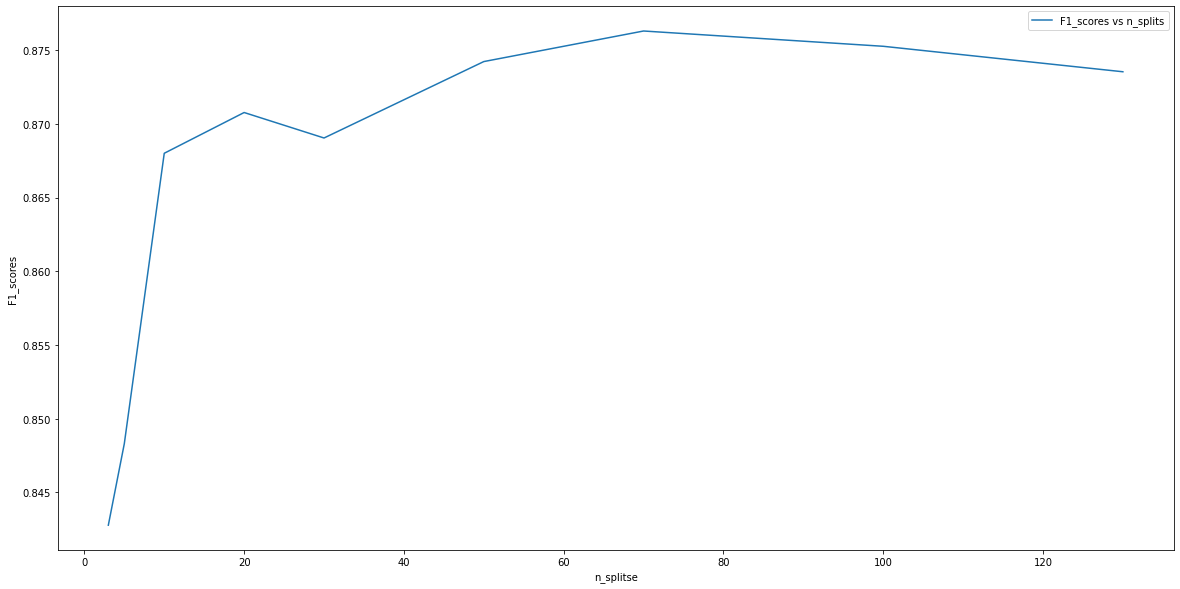

In [305]:
plt.figure(figsize=(20, 10))
plt.plot(n_splits, f1_scores, label="F1_scores vs n_splits")
plt.xlabel("n_splitse")
# plt.xticks(range(1, 11, 1))
plt.ylabel("F1_scores")
plt.legend(loc='best')
plt.show()

Najlepszy wynik uzyskujemy dla korswalidacji podzielonej na n_splits=70 przy AdaBoostClassifier na danych standaryzowanych MinMaxScaler'em. 

AdaBoostClassifier
              precision    recall  f1-score   support

           0       0.90      0.85      0.87      3377
           1       0.86      0.90      0.88      3377

    accuracy                           0.88      6754
   macro avg       0.88      0.88      0.88      6754
weighted avg       0.88      0.88      0.88      6754

Average F1 score: 0.8759253775540421


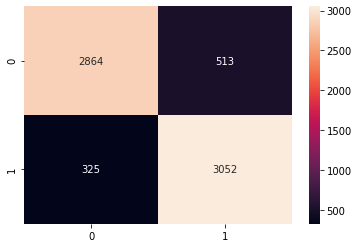

In [308]:
for train_index, test_index in StratifiedKFold(n_splits=70, shuffle=True, random_state=42).split(X_minmax_standarized, y):
    X_train, X_test = X_minmax_standarized[train_index], X_minmax_standarized[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    clf_boosting.fit(X=X_train, y=y_train)  #AdaBoostClassifier
    predicted.extend(clf_boosting.predict(X_test))
    true.extend(y_test)
print(f'{clf_boosting.__class__.__name__}\n{classification_report(true, predicted)}\nAverage F1 score: {f1_score(true, predicted, average="micro")}')
cm = confusion_matrix(true, predicted)
sns.heatmap(cm, annot=True, fmt='d')
plt.show()

#Ostateczna predykcja na zbiorze testowym

In [332]:
data_final_test.tail()

,EmployeeNumber,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition
1465,100142,35.0,Non-Travel,208.0,Research & Development,8.0,4.0,Life Sciences,3.0,Female,52.0,3.0,2.0,Healthcare Representative,3.0,Married,4148.0,12250.0,1.0,No,12.0,3.0,4.0,1.0,15.0,5.0,3.0,14.0,11.0,2.0,9.0,NaN
1466,100143,41.0,Travel_Rarely,582.0,Research & Development,28.0,4.0,Life Sciences,1.0,Female,60.0,2.0,4.0,Manufacturing Director,2.0,Married,13570.0,5640.0,0.0,No,23.0,4.0,3.0,1.0,21.0,3.0,3.0,20.0,7.0,0.0,10.0,NaN
1467,100144,42.0,Travel_Rarely,1396.0,Research & Development,6.0,3.0,Medical,3.0,Male,83.0,3.0,3.0,Research Director,1.0,Married,13348.0,14842.0,9.0,No,13.0,3.0,2.0,1.0,18.0,3.0,4.0,13.0,7.0,5.0,7.0,NaN
1468,100145,44.0,Travel_Rarely,621.0,Research & Development,15.0,3.0,Medical,1.0,Female,73.0,3.0,3.0,Healthcare Representative,4.0,Married,7978.0,14075.0,1.0,No,11.0,3.0,4.0,1.0,10.0,2.0,3.0,10.0,7.0,0.0,5.0,NaN
1469,100146,44.0,Non-Travel,381.0,Research & Development,24.0,3.0,Medical,1.0,Male,49.0,1.0,1.0,Laboratory Technician,3.0,Single,3708.0,2104.0,2.0,No,14.0,3.0,3.0,0.0,9.0,5.0,3.0,5.0,2.0,1.0,4.0,NaN


In [310]:
# Przygotowanie danych testowych

# Zamiana w etykietowwanych featurach etykiet klasyfikujących na one hot vector
data_final_test_dummies = pd.get_dummies(data_final_test, columns=['BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole', 'MaritalStatus', 'OverTime'])

In [311]:
# Przypisanie wartości do danych testowych
X_final_test = data_final_test_dummies.loc[:,data_final_test_dummies.columns != 'Attrition']

In [313]:
# Finalna predykcja
y_final_predict = clf_boosting.predict(X_final_test)

In [330]:
# Weryfiukacja predykcyjnych wartości
pd.DataFrame(y_final_predict).value_counts()

1    112
0     35
dtype: int64

In [339]:
y_final_predict

array([1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1,
       1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0])

In [344]:
# Nadpisanie predykcyjnych wartości za NaNy w zbiorze testowym
data_final_test_dummies.Attrition = y_final_predict

In [346]:
data_final_test_dummies.tail()

,EmployeeNumber,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition,BusinessTravel_Non-Travel,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,Department_Human Resources,Department_Research & Development,Department_Sales,EducationField_Human Resources,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree,Gender_Female,Gender_Male,JobRole_Healthcare Representative,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,OverTime_No,OverTime_Yes
1465,100142,35.0,208.0,8.0,4.0,3.0,52.0,3.0,2.0,3.0,4148.0,12250.0,1.0,12.0,3.0,4.0,1.0,15.0,5.0,3.0,14.0,11.0,2.0,9.0,1,1,0,0,0,1,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0
1466,100143,41.0,582.0,28.0,4.0,1.0,60.0,2.0,4.0,2.0,13570.0,5640.0,0.0,23.0,4.0,3.0,1.0,21.0,3.0,3.0,20.0,7.0,0.0,10.0,1,0,0,1,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0
1467,100144,42.0,1396.0,6.0,3.0,3.0,83.0,3.0,3.0,1.0,13348.0,14842.0,9.0,13.0,3.0,2.0,1.0,18.0,3.0,4.0,13.0,7.0,5.0,7.0,1,0,0,1,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,1,0
1468,100145,44.0,621.0,15.0,3.0,1.0,73.0,3.0,3.0,4.0,7978.0,14075.0,1.0,11.0,3.0,4.0,1.0,10.0,2.0,3.0,10.0,7.0,0.0,5.0,0,0,0,1,0,1,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0
1469,100146,44.0,381.0,24.0,3.0,1.0,49.0,1.0,1.0,3.0,3708.0,2104.0,2.0,14.0,3.0,3.0,0.0,9.0,5.0,3.0,5.0,2.0,1.0,4.0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,1,0


In [ ]:
data_final_test_dummies[data_final_test_dummies['EmployeeNumber', 'Attrition']]